# PHYS 481 Assignment 3: ODEs

### Trace Harms - (30132648) 

### Alec Lunn - (30038218) 

### Ayesha Iqbal - (30097679)

## Introduction: 


In [25]:
# importing relevant libraries for Assignment 3
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline



The state vector for $ y'' + \sin(t) + 1 = 0 $ is 

\begin{align*}
S_1' &= y' \\
S_2' &= -\sin(t) - 1
\end{align*}

In [26]:
#1.a)
def F_q1(S, t):
    '''
    This function accepts the state vector S=transpose([y,y']) and the independent variable t (time).
    It returns a numpy array with the the derivative dS/dt for the ODE in question 1.
    ************* I SHOULD MAKE THIS WORK FOR GENERAL ODE'S ******************
    '''
    
    y_prime = S[1]
    return np.array([y_prime, -np.sin(t) - 1])


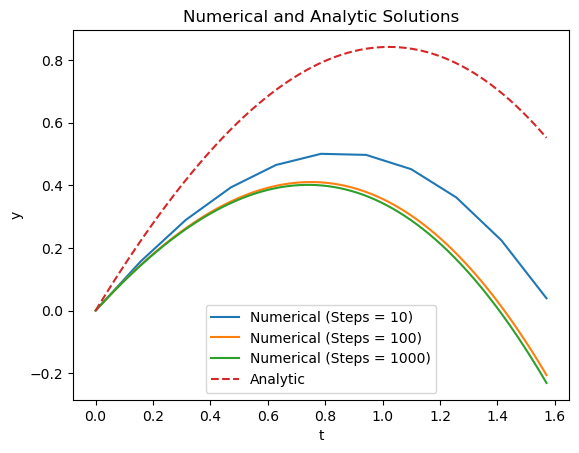

In [27]:
#1.b)
def ODE_integrate_Euler(F, interval, S0, n_steps):
    """
    This function integrates the second-order ODE d^2y/dt^2=f(y,y',t) in the form dS/dt=F(S,t) where S=transpose([y,y']) using Euler's method.
    It accepts the function F(S,t), the interval on which to solve, the initial value S0 and the number of steps to use.
    It returns y and t at every step.
    """
    # create array for interval spaced by n_steps
    t_points = np.linspace(interval[0], interval[1], n_steps+1)
    # size of time step
    h = (interval[1] - interval[0]) / n_steps
    # matrix for results
    S = np.zeros((n_steps+1, len(S0)))
    # initial value
    S[0] = S0
    
    # Euler method: The next step is the previous step + the spacing * derivative of the previous step wrt t
    for i in range(n_steps):
        S[i+1] = S[i] + h * F(S[i], t_points[i])
    
    return t_points, S

# define initial conditions 
S0 = np.array([0, 1])
interval = [0, np.pi/2]
n_steps = [10, 100, 1000]

# analytic solution
def analytic_solution(t):
    '''
    This function accepts range of t values
    returns analytic solution at t values
    **************** MAYBE USE DIFFERENT C2 CONSTANT?? *****************
    '''
    c1 = 0
    c2 = 1/2
    return c1 + c2*t - t**2/2 + np.sin(t)

# integrate using numerical for different steps and plot results
for steps in n_steps:
    t_points, S = ODE_integrate_Euler(F_q1, interval, S0, steps)
    plt.plot(t_points, S[:, 0], label=f'Numerical (Steps = {steps})')

# integrate using analytic and plot results
t_analytic = np.linspace(interval[0], interval[1], 1000)
y_analytic = analytic_solution(t_analytic)
plt.plot(t_analytic, y_analytic, label='Analytic', linestyle='dashed')

plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.title('Numerical and Analytic Solutions')
plt.show()


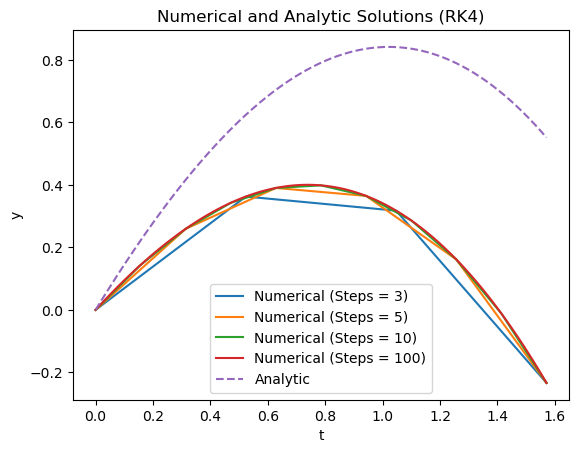

In [28]:
#1.c)

def ODE_integrate_RK4(F, interval, S0, n_steps):
    """
    This function integrates the second-order ODE d^2y/dt^2=f(y,y',t) in the form dS/dt=F(S,t) where S=transpose([y,y']) using RK4 (4th order Runge-Kutta).
    It accepts the function F(S,t), the interval on which to solve, the initial value S0 and the number of steps to use.
    It returns y and t at every step.
    """
     # create array for interval spaced by n_steps
    t_points = np.linspace(interval[0], interval[1], n_steps+1)
    # size of time step
    h = (interval[1] - interval[0]) / n_steps
    # matrix for results
    S = np.zeros((n_steps+1, len(S0)))
    # initial value
    S[0] = S0
    
    for i in range(n_steps):
        # apply Runge Kutta Formulas to find next value of y (https://www.geeksforgeeks.org/runge-kutta-4th-order-method-solve-differential-equation/)
        k1 = h * F(S[i], t_points[i])
        k2 = h * F(S[i] + 0.5*k1, t_points[i] + 0.5*h)
        k3 = h * F(S[i] + 0.5*k2, t_points[i] + 0.5*h)
        k4 = h * F(S[i] + k3, t_points[i] + h)
        
        S[i+1] = S[i] + (k1 + 2*k2 + 2*k3 + k4) / 6
    
    return t_points, S


# modifying the steps
n_steps = [3,5,10,100]

# run the algorithm for n steps
for steps in n_steps:
    t_points, S = ODE_integrate_RK4(F_q1, interval, S0, steps)
    plt.plot(t_points, S[:, 0], label=f'Numerical (Steps = {steps})')


# plotting specifications
plt.plot(t_analytic, y_analytic, label='Analytic', linestyle='dashed')

plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.title('Numerical and Analytic Solutions (RK4)')
plt.show()
